


.
<font color=black size=4 face=雅黑>**---------------------2023中山大学人工社会与计算社会科学讲习班---------------**</font>

.
<font color=black size=4 face=雅黑>**----------------------------机器学习实战  贾小双-------------------------**</font>




# Introduction




                  
## 本次课程内容：
1 线性回归模型及其变量筛选（lasso）

2 异质性群体分解——聚类算法

3 树形分类回归模型——决策树与随机森林

4 基于机器学习的因果推断

## 数据
个案数：随机抽取了1000个个案。

变量：对原始数据进行了处理，保留和生成以下变量：
<img src="./pics/variables.png">


# 线性回归模型与lasso筛选变量

## 一元线性回归模型实现  
    
在python中做线性回归既可以用统计方法也可以用机器学习方法，分别用不同的package实现：

    统计模型——statsmodels包，可以输出详细的统计结果（包括系数、常数项、P值、R方等）。

    机器学习模型——Scikit-learn （sklearn）包，sklearn不能输出非常详细的结果，但是注重模型的泛化和预测能力
    
    

二者区别：statsmodels更关注统计推断，而scikit-learn注重预测。





In [1]:
### 导入相关package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#机器学习模型：
from sklearn import linear_model

import warnings
import statsmodels
import statsmodels.api as sm
warnings.filterwarnings("ignore")

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#统计模型：


In [4]:
import statsmodels
print("Statsmodels Version:", statsmodels.__version__)


Statsmodels Version: 0.14.0


SyntaxError: invalid syntax (<ipython-input-12-bf3a67ab58f5>, line 1)

In [5]:
pip install --upgrade scipy statsmodels

SyntaxError: invalid syntax (<ipython-input-5-572a50feecca>, line 1)

In [7]:
#读入数据
df=pd.read_csv('data4ml.csv')

In [9]:
#查看数据
print(df.shape)
print("variables: ",list(df.columns))
df.head()

(1000, 26)
variables:  ['id', 'age', 'gender', 'lnincm', 'lnfincm', 'isco08', 'manage', 'dwtype', 'tizhi', 'party', 'hukou', 'wide', 'nwtop', 'edu', 'listening', 'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08', 'ht', 'wt', 'rd1', 'rd2', 'rd3']


,id,age,gender,lnincm,lnfincm,isco08,manage,dwtype,tizhi,party,...,book,newsp,eread,isei08,siops08,ht,wt,rd1,rd2,rd3
0,2489,44,0,8.335112,9.028139,2330,3,2,1,0,...,1.00,0.013699,2.0,82.410004,62.630001,158,120,0.707378,1.481183,2.204248
1,9546,33,0,5.525453,7.419181,7223,3,6,0,0,...,0.25,0.000000,2.0,28.700001,37.869999,160,160,0.686814,1.948797,0.361991
2,8396,59,1,6.726633,8.335112,9210,3,11,0,0,...,0.00,0.000000,0.0,11.740000,22.160000,168,145,0.168046,1.719215,5.956255
3,9161,56,0,6.726633,8.335112,9210,3,11,0,0,...,0.00,0.000000,0.0,11.740000,22.160000,163,100,0.102847,1.019467,1.275537
4,9433,67,1,6.034684,7.824446,9210,3,11,0,0,...,0.00,0.000000,0.0,11.740000,22.160000,173,130,0.123844,1.755655,5.490700


### 统计模型

使用statsmodels来建统计回归模型

In [10]:
#首先要规定自变量和因变量
y = df['wt']  #因变量是数据df中的wt这一列
x = df['ht'] # 自变量是数据df中的ht这一列
x = sm.add_constant(x) # 加入截距项
stats = sm.OLS(y, x).fit() #构建ols回归模型并拟合
print(stats.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:                     wt   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     436.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.00e-80
Time:                        15:59:49   Log-Likelihood:                -4389.1
No. Observations:                1000   AIC:                             8782.
Df Residuals:                     998   BIC:                             8792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -133.4264     12.298    -10.850      0.0

stata 结果
<img src="./pics/wtht.png" width=520 heigth=340> 


In [11]:
#使用stats模型预测Y值
predy = stats.predict() 
df['statswt']=predy

In [12]:
df.head(1)

,id,age,gender,lnincm,lnfincm,isco08,manage,dwtype,tizhi,party,...,newsp,eread,isei08,siops08,ht,wt,rd1,rd2,rd3,statswt
0,2489,44,0,8.335112,9.028139,2330,3,2,1,0,...,0.013699,2.0,82.410004,62.630001,158,120,0.707378,1.481183,2.204248,114.446778


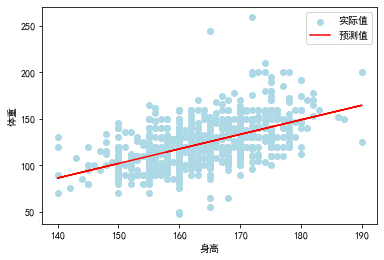

In [13]:
# 画图看拟合情况：

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = df['ht'] # 自变量
plt.scatter(x, y, color = 'lightblue',label='实际值') # 散点图
plt.plot(x, predy, color = 'red', label='预测值') #回归直线
plt.xlabel("身高") #行标签
plt.ylabel("体重") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

In [14]:
# 预测值和真实值对比
df[['statswt','wt']].describe()

,statswt,wt
count,1000.000000,1000.000000
mean,123.240000,123.240000
std,12.902760,23.386777
min,86.208064,47.000000
25%,114.446778,110.000000
50%,122.290865,120.000000
75%,133.272588,140.000000
max,164.648937,260.000000


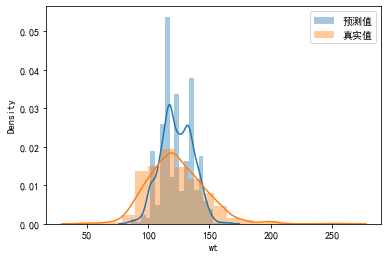

In [15]:
#真实值与预测值分布图

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

sns.distplot(df['statswt'],bins=20,label='预测值')
sns.distplot(df['wt'],bins=20,label='真实值')
plt.legend()
plt.show()

### 机器学习模型

使用sklearn中的 linear_model来训练机器学习回归模型

In [16]:
#训练ols模型
sklm= linear_model.LinearRegression()
x=df[['ht']]
y=df['wt']
#拟合模型
sklm.fit(x, y)
intercept=sklm.intercept_  #截距
coef=sklm.coef_ #线性模型的系数
R2=sklm.score(x,y)

print("intercept: ",intercept, "coef: ",coef,"R2: ", R2)

intercept:  -133.42637899607064 coef:  [1.56881745] R2:  0.30438586233847564


In [17]:
#使用stats模型预测Y值
predy = sklm.predict(x) 
df['sklmwt']=predy

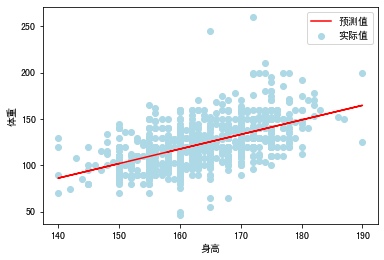

In [18]:
# 画图看拟合情况：
# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(df['ht'], df['wt'], color = 'lightblue',label='实际值') # 散点图
plt.plot(df['ht'], df['sklmwt'], color = 'red', label='预测值') #回归直线
plt.xlabel("身高") #行标签
plt.ylabel("体重") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

In [19]:
# sklearn模型预测值，真实值，statsmodels模型预测值对比
df[['sklmwt','wt','statswt']].describe()

,sklmwt,wt,statswt
count,1000.000000,1000.000000,1000.000000
mean,123.240000,123.240000,123.240000
std,12.902760,23.386777,12.902760
min,86.208064,47.000000,86.208064
25%,114.446778,110.000000,114.446778
50%,122.290865,120.000000,122.290865
75%,133.272588,140.000000,133.272588
max,164.648937,260.000000,164.648937


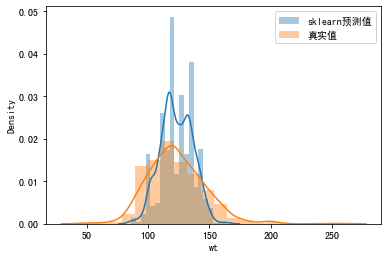

In [20]:
#真实值与预测值分布图

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


sns.distplot(df['statswt'],bins=20,label='sklearn预测值')
sns.distplot(df['wt'],bins=20,label='真实值')

plt.legend()
plt.show()

## 多元线性回归与交叉验证

多元线性回归和一元线性回归的操作一样,只是在使用sklearn是自变量不需要再做加轴处理

以收入为例进行线性回归分析：

    因变量为收入，

    自变量依次为：性别、年龄、受教育年限

    回归方程：lnincm = β1·gender + β2·age + β3·edu + c


In [21]:
# statsmodels统计模型
X = df[['gender','age','edu'] ] #自变量
y = df['lnincm'] # 因变量
X = sm.add_constant(X) # 加入截距项
mstats = sm.OLS(y, X).fit() #构建ols回归模型并拟合
print(mstats.summary())
# 预测y值：
df['mstatsy']= mstats.predict() 

                            OLS Regression Results                            
Dep. Variable:                 lnincm   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     56.70
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           7.69e-34
Time:                        19:20:06   Log-Likelihood:                -2363.2
No. Observations:                1000   AIC:                             4734.
Df Residuals:                     996   BIC:                             4754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4986      0.406      8.613      0.0

In [22]:
# sklearn模型
msklm= linear_model.LinearRegression()
X = df[['gender','age','edu'] ] #自变量
y = df['lnincm'] # 因变量
msklm.fit(X, y)
intercept=msklm.intercept_  #截距
coef=msklm.coef_ #线性模型的系数
R2m=msklm.score(X,y)
print("intercept: ",intercept,"\n", "coef: ",coef, "\n", "R2: ", R2m)


intercept:  3.4985813972481523 
 coef:  [0.82521512 0.01239134 0.22045412] 
 R2:  0.14586589601962363


### 划分训练集、测试集

In [5]:
#导入 train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [24]:
#查看数据的变量
print(df.columns)

Index(['id', 'age', 'gender', 'lnincm', 'lnfincm', 'isco08', 'manage',
       'dwtype', 'tizhi', 'party', 'hukou', 'wide', 'nwtop', 'edu',
       'listening', 'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08',
       'ht', 'wt', 'rd1', 'rd2', 'rd3', 'statswt', 'sklmwt', 'mstatsy'],
      dtype='object')


In [17]:
#定义feature 和 label
feature=['age', 'gender', 'isco08', 'manage','dwtype', 'tizhi', 'party', 'hukou', 'wide', 'nwtop', 'edu',
       'listening', 'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08','ht', 'wt', 'rd1', 'rd2', 'rd3']
label=['lnincm']

inputs=df[feature]
labels=df[label]

#划分训练集和测试集
(train_X,
 test_X,
 train_y,
 test_y) = train_test_split(inputs, labels, train_size=0.3, random_state=5029)

#看一下数据集长什么样子
print(train_X.shape,test_X.shape,)
train_X.head(1)

(300, 23) (700, 23)


,age,gender,isco08,manage,dwtype,tizhi,party,hukou,wide,nwtop,...,book,newsp,eread,isei08,siops08,ht,wt,rd1,rd2,rd3
876,55,1,5245,3,3,1,0,1,2,40,...,0.0,0.0,0.0,39.040001,25.0,162,120,0.14584,1.772176,7.807668


### 评估机器学习模型在测试集上的表现



In [26]:
# 用训练集数据训练线性回归模型
msklm_tr= linear_model.LinearRegression()
X = train_X[['gender','age','edu'] ] #自变量
y = train_y['lnincm'] # 因变量
msklm_tr.fit(X, y)
intercept=msklm_tr.intercept_  #截距
coef=msklm_tr.coef_ #线性模型的系数
#预测Y值
y_tr=msklm_tr.predict(X)
#R2
R2m_tr=msklm_tr.score(X,y)
#MSE
mse_tr=MSE(train_y['lnincm'],y_tr)

print("intercept: ",intercept,"\n", "coef: ",coef, "\n", "R2: ", R2m_tr,'\n' "MSE_train: ",mse_tr)


intercept:  3.6842699759695527 
 coef:  [0.63547996 0.01348207 0.21131208] 
 R2:  0.1382459692615844 
MSE_train:  6.446849804475359


In [27]:
#用训练好的模型来拟合测试集的数据
X_te = test_X[['gender','age','edu'] ] #自变量
y_te1 = test_y
msklm_tr.fit(X_te,y_te1) 
y_te=msklm_tr.predict(X_te)

In [28]:
#模型评估
#R2
R2m_te=msklm_tr.score(X_te,test_y['lnincm'])
#MSE
mse_te=MSE(test_y['lnincm'],y_te)
print(" 训练集R2: ",R2m_tr,'\n',
      "测试集R2: ", R2m_te ,'\n',
      "训练集MSE: ",mse_tr,"\n",
      "测试集MSE: ",mse_te,"\n")

 训练集R2:  0.1382459692615844 
 测试集R2:  0.1498800793076892 
 训练集MSE:  6.446849804475359 
 测试集MSE:  6.669330476634241 



1 对训练集和测试集的划分是随机的，当取不同随机数种子时，由于数据集的变化，模型的效果也会发生变化

2 训练集和测试集的比例改变，模型效果也会发生改变


## 变量选择 

如何看变量加入是否有意义？

传统定量研究：

1 看p值判断加入的变量对Y的影响是否显著

2 看R2增加变量是否提高了模型的解释力

结果：
<img src="./pics/regmodel.png" width=520 heigth=440>


变量越多越好吗？



一些研究中常见做法——发挥理论功底，自圆其说？ <img src="./pics/doge.png" width=120 heigth=100>


机器学习变量选择——数据驱动


### 代码实现lasso回归

In [19]:
#sklearn中的linear_model下的一个子模块
#我们将所有feature中的自变量都放进去
lso = linear_model.Lasso(alpha=0.1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

age 0.011070232692792361
gender 0.0
isco08 -0.0002055371144444255
manage -0.0
dwtype -0.14409317779052583
tizhi 0.0
party -0.0
hukou 0.0
wide -0.0
nwtop 0.0053974094678459344
edu 0.07219759368569599
listening 0.0
speaking -0.0
book 0.0
newsp 0.0
eread 0.008540688467361938
isei08 -0.018472323079820985
siops08 0.016935418670276186
ht 0.034432860209582875
wt 0.008743683469236386
rd1 0.0
rd2 0.0
rd3 -0.0
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.102675402885573


In [30]:
#改变alpha
lso = linear_model.Lasso(alpha=1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

age 0.0028518811623138756
gender 0.0
isco08 -0.0002972451062624354
manage -0.0
dwtype -0.039259344483252245
tizhi 0.0
party 0.0
hukou 0.0
wide 0.0
nwtop 0.0055885090221306395
edu 0.0042527981409043345
listening 0.0
speaking 0.0
book 0.0
newsp 0.0
eread 0.0
isei08 0.0
siops08 0.0
ht 0.026040341273866566
wt 0.011703883774732513
rd1 0.0
rd2 0.0
rd3 -0.0
截距： [2.54681836] 
 R2: 0.18314764200318345 
 MSE: 6.3208470344983905


In [31]:
#改变alpha
lso = linear_model.Lasso(alpha=0.1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

age 0.011070232692792361
gender 0.0
isco08 -0.0002055371144444255
manage -0.0
dwtype -0.14409317779052577
tizhi 0.0
party -0.0
hukou 0.0
wide -0.0
nwtop 0.0053974094678459344
edu 0.07219759368569596
listening 0.0
speaking -0.0
book 0.0
newsp 0.0
eread 0.008540688467361968
isei08 -0.018472323079820992
siops08 0.016935418670276193
ht 0.034432860209582854
wt 0.008743683469236386
rd1 0.0
rd2 0.0
rd3 -0.0
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.102675402885573


In [32]:
#把变量名和系数储存成dataframe方便查看
df_coef=pd.DataFrame(list(zip(list(inputs.columns),lso.coef_)), 
                     columns = ['variables', 'coef'])

In [33]:
#把变量名和系数储存成dataframe方便查看
df_coef=pd.DataFrame(list(zip(list(inputs.columns),lso.coef_)), 
                     columns = ['variables', 'coef'])
#变量选择：保留变量系数不为0 的
df_coef.loc[df_coef['coef']!=0]

,variables,coef
0,age,0.011070
2,isco08,-0.000206
4,dwtype,-0.144093
9,nwtop,0.005397
10,edu,0.072198
15,eread,0.008541
16,isei08,-0.018472
17,siops08,0.016935
18,ht,0.034433
19,wt,0.008744


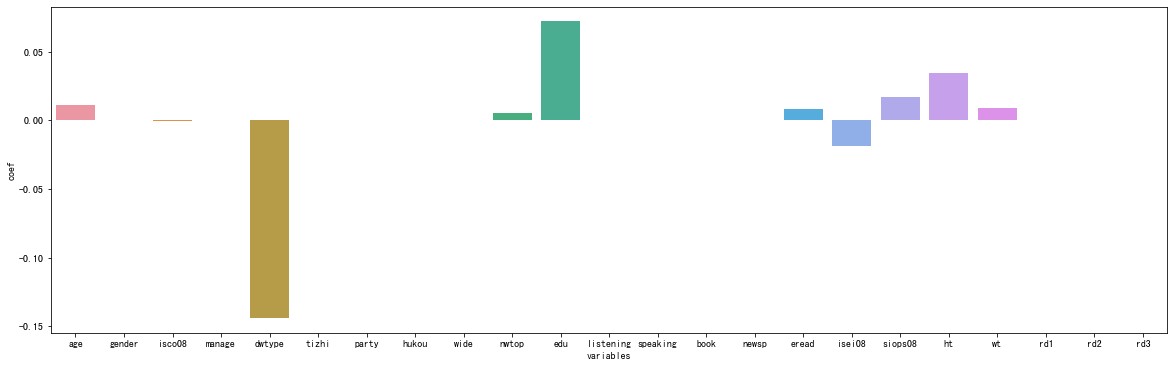

In [34]:
#系数大小条状图
plt.figure(figsize=(20,6))
sns.barplot(df_coef['variables'],df_coef['coef'])
plt.show()

In [35]:
 #使用循环来定义多个alpha取值，
for i in np.linspace(0.01,0.5,10):    #生成一个[0.1,0.5]之间的一个10个元素的线性序列  
    print("当alpha=",i,"时")
    lasso = linear_model.Lasso(alpha = i)    
    lasso.fit(inputs,labels)   
    pry=lasso.predict(inputs)
#     for n,m in zip(list(inputs.columns),lso.coef_):  
#         print(n,m)      #打印每一个alpha取值下的变量系数
    print("截距：",lso.intercept_,'\n',
          "R2:",lso.score(inputs,labels),'\n',
           "MSE:",MSE(labels,pry),'\n','\n')   

当alpha= 0.01 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 5.924652051807003 
 

当alpha= 0.06444444444444444 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.0303749290166415 
 

当alpha= 0.11888888888888888 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.105837722615484 
 

当alpha= 0.17333333333333334 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.111074682721123 
 

当alpha= 0.22777777777777777 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.118263042413522 
 

当alpha= 0.2822222222222222 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.127403001842685 
 

当alpha= 0.33666666666666667 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.138494346565067 
 

当alpha= 0.3911111111111111 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.151537324154966 
 

当alpha= 0.44555555555555554 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.166531989808981 
 

当alpha= 0.5 时
截距： [0.65071163] 
 R2: 0.21134228280975154 
 MSE: 6.179409592000572 
 



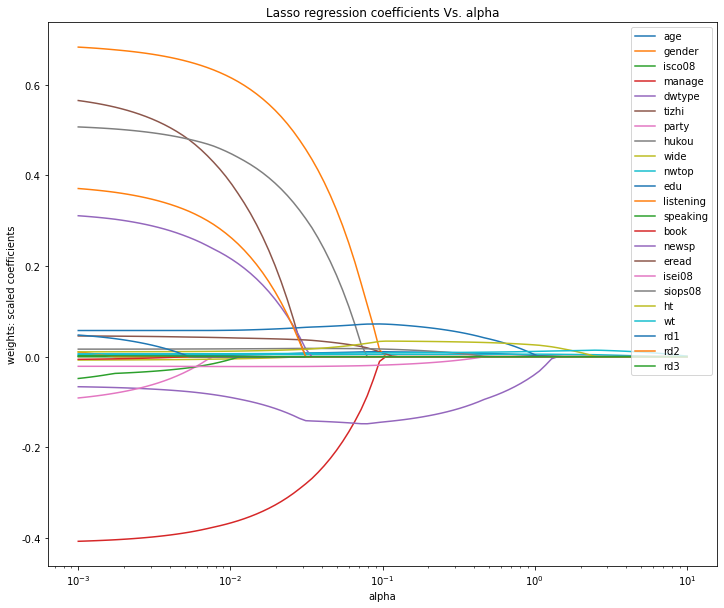

In [47]:
#不同lambda对应的系数值
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = linear_model.Lasso()
coefs_lasso = []


for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(inputs,labels)
    coefs_lasso.append(lasso.coef_)

plt.rcParams['font.sans-serif']=['Microsoft YaHei']   
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(feature,loc="upper right")

plt.show()


图中展示的是不同的变量随着alpha惩罚后，其系数的变化，我们要保留的就是系数不为0的变量。alpha值不断增大时系数才变为0的变量在模型中越重要。

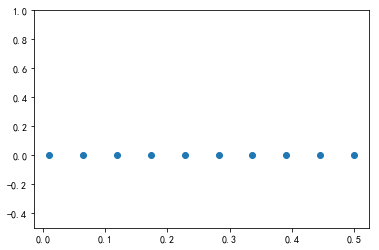

In [33]:
#生成等差数列：
al = np.linspace(0.01,0.5,10)
y = np.zeros(10)
plt.ylim([-0.5, 1])
plt.plot(al,y,'o')
plt.show()

## 练习：

使用循环，按不同比例划分训练集和测试集，使用不同的alpha取值来训练lasso回归模型，并找出结果最好的模型

# 聚类算法——异质性群体分解

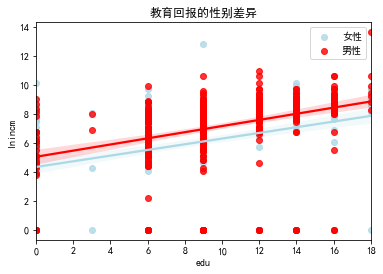

In [20]:
# 男性和女性教育回报的差异
#有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
d1=df.loc[df['gender']==0]
d2=df.loc[df['gender']==1]

sns.regplot(d1['edu'],d1['lnincm'] , color = 'lightblue',label='女性') # 散点图
sns.regplot(d2['edu'],d2['lnincm'], color = 'red', label='男性') #回归直线
# plt.xlabel("") #行标签
# plt.ylabel("体重") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.title('教育回报的性别差异')
plt.show() # 显示图形

基于理论的群体划分只能基于低维特征进行划分，而不能解决当决定子群体分割的特征维度较高时如何识别这些子群体

因此我们需要使用机器学习的方法，让机器通过对特征的相似性计算来对群体进行聚类


.
 <font color=black size=4 face=雅黑>**sklear中的10种聚类算法：**</font>


    K-Means
    Mini-Batch K-Means
    Mean Shift
    Affinity Propagation
    Agglomerative Clustering
    BIRCH
    DBSCAN
    OPTICS
    Spectral Clustering
    Mixture of Gaussians

clusetring的9种：https://scikit-learn.org/stable/modules/clustering.html

高斯混合：https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture


十种聚类算法的介绍：https://machinelearningmastery.com/clustering-algorithms-with-python/

常见的三种评估聚类性能的内部指标：
https://blog.csdn.net/qq_27825451/article/details/94436488

## 数据预处理——标准化
https://blog.csdn.net/weixin_40807247/article/details/82793220

In [24]:
#数据 ： 原始数据去掉rd1,rd2,rd3(随机生成的变量)和id，生成新的数据
data=df[['age', 'gender', 'lnincm', 'lnfincm', 'isco08', 'manage', 'dwtype', 'tizhi', 'party', 'hukou','edu',  
         'wide', 'nwtop', 'listening', 'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08', 'ht', 'wt', ]]

In [25]:
data.shape
data.columns

Index(['age', 'gender', 'lnincm', 'lnfincm', 'isco08', 'manage', 'dwtype',
       'tizhi', 'party', 'hukou', 'edu', 'wide', 'nwtop', 'listening',
       'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08', 'ht', 'wt'],
      dtype='object')

In [41]:
#聚类模型不允许存在缺失值，先检查缺失值
nan=[]
for i in data.columns:
   # print(i,data[i].isnull().values.any())
    nan.append(data[i].isnull().values.any())
print(set(nan))

{False}


In [27]:
# 导入sklearn中的数据处理函数中的标准化函数
from sklearn.preprocessing import scale  # z-score标准化
from sklearn.preprocessing import MinMaxScaler # 离差标准化

In [42]:
#scale函数可以直接对dataframe进行标准化，得到一个numpy数组
scale(data) #得到的是一个numpy数组，我们将其转化为df方便查看
datastd=pd.DataFrame(scale(data),columns=list(data.columns))
datastd.values
#MinMaxScaler使用方法一样，sklearn.preprocessing给出了很多标准化、正则化的方法

In [43]:
datastd.head(2)

,age,gender,lnincm,lnfincm,isco08,manage,dwtype,tizhi,party,hukou,...,nwtop,listening,speaking,book,newsp,eread,isei08,siops08,ht,wt
0,-0.467868,-0.972381,0.655244,0.583647,-1.618571,0.471009,-1.454574,1.557131,-0.372763,1.053425,...,0.477673,0.705964,-0.557298,0.507438,-0.312507,0.536415,2.445261,2.007888,-0.681840,-0.138609
1,-1.162314,-0.972381,-0.354794,-0.316879,0.250340,0.471009,-0.306981,-0.642207,-0.372763,-0.949284,...,0.477673,-0.589383,-0.557298,-0.087293,-0.354853,0.536415,-0.167080,0.218131,-0.438543,1.572615


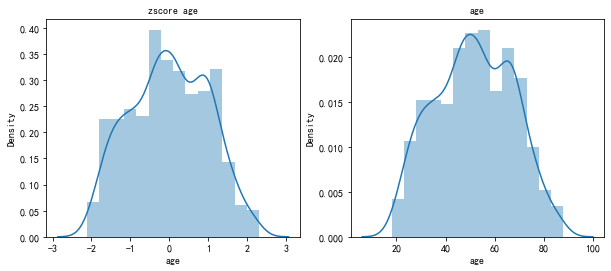

-8.526512829121202e-17 1.0005003753127735 51.411 15.847877909494178


In [30]:
#标准化后的年龄分布
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.distplot(datastd['age'],ax=ax1)
sns.distplot(data['age'],ax=ax2)
ax1.set_title ('zscore age',fontsize=10)
ax2.set_title ('age',fontsize=10)
plt.show()
print(datastd['age'].mean(),datastd['age'].std(),data['age'].mean(),data['age'].std())

In [2]:
# 导入packages
from sklearn import mixture #导入聚类包
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
#聚类指标评估  轮廓系数、CH得分，DBI
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

## kmeans聚类代码实现

In [1]:
#定义随机数种子以保证每次结果相同
np.random.seed(12345)
# 运行 kmeans 聚类，聚3类
km = KMeans(n_clusters=3, random_state=250,max_iter=3000)#.fit(datastd.values)

NameError: name 'np' is not defined

In [57]:
#将类别标签加入dataframe,方便后面对比
df['kmeans']=km.labels_ 
#查看结果
print('kmeans:','nclusters:',3,'inertia:',km.inertia_, 'n_iter:',km.n_iter_, ) 
print('clustercenters: ',km.cluster_centers_ )

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [59]:
#聚类效果评估 
#写法就是评估函数（X，labels）
ksh=silhouette_score(datastd.values,km.labels_)   #轮廓系数越大越好
kch=calinski_harabasz_score(datastd.values,km.labels_)  #ch得分越大越好
kdbi=davies_bouldin_score(datastd.values,km.labels_)  #DBI越小越好
print(ksh,kch,kdbi)

0.13526835082183392 210.73693925928657 2.2202394637893463


## 凝聚层次聚类代码实现

In [34]:
#规定距离测量方式affinity
distances=[ 'euclidean', 'manhattan', 'cosine']   #L1 L2距离分别等价于曼哈顿和欧式距离，不再重复

#规定合并时依据的簇间距离测量方式：linkage
linkages=['single','average','complete']  #ward只能用于欧式距离

#不同距离测量，average linkage
for d in distances:
    hierachical=AgglomerativeClustering(n_clusters=3,affinity=d,linkage='average').fit(data.values)
    #模型评估
    ksh=silhouette_score(datastd.values,hierachical.labels_)   #轮廓系数越大越好
    kch=calinski_harabasz_score(datastd.values,hierachical.labels_)  #ch得分越大越好
    kdbi=davies_bouldin_score(datastd.values,hierachical.labels_)  #DBI越小越好
    print('距离测量: ',d,'\n','nclusters:',3,'linkage: average',
         '轮廓系数： ',ksh, 'CH-score: ',kch, 'DBI: ',kdbi)

print('\n')
#不同合并方式，euclidean distance
for l in linkages:
    hierachical=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage=l).fit(data.values)
    #模型评估
    ksh=silhouette_score(datastd.values,hierachical.labels_)   #轮廓系数越大越好
    kch=calinski_harabasz_score(datastd.values,hierachical.labels_)  #ch得分越大越好
    kdbi=davies_bouldin_score(datastd.values,hierachical.labels_)  #DBI越小越好
    print('linkage:',l,'\n','nclusters:',3,'距离测量:','euclidean',
         '轮廓系数:',ksh, 'CH-score:',kch, 'DBI:',kdbi)


距离测量:  euclidean 
 nclusters: 3 linkage: average 轮廓系数：  0.12563126720982595 CH-score:  138.9957032186941 DBI:  2.773633961771529
距离测量:  manhattan 
 nclusters: 3 linkage: average 轮廓系数：  0.12563126720982595 CH-score:  138.9957032186941 DBI:  2.773633961771529
距离测量:  cosine 
 nclusters: 3 linkage: average 轮廓系数：  0.20793496936965053 CH-score:  96.93319438073583 DBI:  3.757835138714538


linkage: single 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.13864527077781294 CH-score: 121.53087856745556 DBI: 2.6524501053358356
linkage: average 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.12563126720982595 CH-score: 138.9957032186941 DBI: 2.773633961771529
linkage: complete 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.12563126720982595 CH-score: 138.9957032186941 DBI: 2.773633961771529


In [61]:
# 不同距离，不同合并方式，不同cluser
sdf=pd.DataFrame()
for l in linkages[:]:
    for d in distances:
        for i in range(3,6):
            ag=AgglomerativeClustering(n_clusters=3,affinity=d,linkage=l).fit(datastd.values)
            ksh=silhouette_score(datastd.values,ag.labels_)   #轮廓系数越大越好
            kch=calinski_harabasz_score(datastd.values,ag.labels_)  #ch得分越大越好
            kdbi=davies_bouldin_score(datastd.values,ag.labels_)  #DBI越小越好
            print(l,d,str(i)+'clusers','轮廓系数:',ksh, 'CH-score:',kch, 'DBI:',kdbi)  

single euclidean 3clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single euclidean 4clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single euclidean 5clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single manhattan 3clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single manhattan 4clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single manhattan 5clusers 轮廓系数: 0.5657280684736357 CH-score: 9.813127513927393 DBI: 0.3111175345726573
single cosine 3clusers 轮廓系数: -0.03539933273746496 CH-score: 1.069032340241985 DBI: 0.9977077951189645
single cosine 4clusers 轮廓系数: -0.03539933273746496 CH-score: 1.069032340241985 DBI: 0.9977077951189645
single cosine 5clusers 轮廓系数: -0.03539933273746496 CH-score: 1.069032340241985 DBI: 0.9977077951189645
average euclidean 3clusers 轮廓系数: 0.3951956925316196 CH-score: 19.46401921816

### 高斯混合聚类

In [62]:
#n_components定义聚类数量
gm = GaussianMixture(n_components=3, random_state=0).fit(datastd.values)
#高斯混合聚类的标签需要先使用gm_predic预测
gm_p=gm.predict(datastd.values)
ksh=silhouette_score(datastd.values,gm_p)   #轮廓系数越大越好
kch=calinski_harabasz_score(datastd.values,gm_p)  #ch得分越大越好
kdbi=davies_bouldin_score(datastd.values,gm_p)  
print(gm,ksh,kch,kdbi)

GaussianMixture(n_components=3, random_state=0) 0.11199812024622073 126.19759013252055 3.911523775785962


## 模型选择

不同种类的聚类模型、模型的参数设置不同都会导致聚类的结果有所差异，那么如何选择模型呢？

我们首先要确定模型评估的指标，然后按照不同的参数设置运行模型，然后选取表现最好的模型。

例子：
 <img src="./pics/chplot.png" width=800 heigth=700>


## 每个类别特征描述可视化

由于我们使用的维度较高，无法像前面的二维数据的例子那样呈现出聚类后每一类长什么样子，不知道聚类聚出了啥，因此我们需要用一些描述统计、可视化的方法来看每一类的特征，再给每个类别起个名字（逻辑和因子分析一样）



例如：

<img src="./pics/vis.png" width=800 heigth=700>


## 练习：

使用不同的模型、不同参数设置对人群进行划分，然后选择出最好的模型，用模型的类别作为分组的依据进行回归



# 决策树与随机森林


决策树的算法：ID3、C4.5、CART，我们现在普遍使用的是CART（分类回归树，Classification and Regression Tree)


## 分类树

In [37]:
#导入决策树-分类树
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
#导入决策树-分类树
from sklearn.tree import DecisionTreeClassifier

KeyError: "None of [Index(['特征1', '特征2', Ellipsis], dtype='object')] are in the [columns]"

In [52]:
# 使用3类别的kmeans聚类
df['kmeans'].unique()

KeyError: 'kmeans'

In [ ]:
# 使用决策树预测kmeans聚类的类别

#划分数据集
all_inputs =df[list(data.columns)].values
all_classes =df['kmeans'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)

#定义决策树模型
decision_tree_classifier = DecisionTreeClassifier(random_state=210)
#在训练集上训练模型
decision_tree_classifier.fit(training_inputs, training_classes)
#在测试集上测试
# Validate the classifier on the testing set using classification accuracy
s=decision_tree_classifier.score(testing_inputs, testing_classes)  #在测试集上的准确性


In [62]:
df.columns

Index(['id', 'age', 'gender', 'lnincm', 'lnfincm', 'isco08', 'manage',
       'dwtype', 'tizhi', 'party', 'hukou', 'wide', 'nwtop', 'edu',
       'listening', 'speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08',
       'ht', 'wt', 'rd1', 'rd2', 'rd3', 'statswt'],
      dtype='object')

In [66]:
print(s)

0.85


In [2]:
# 决策树具有一定的随机性，多运行几次看看

# 100个模型的预测准确率
scors=list() #定义一个空的集合来储存每次的预测准确性
for i in range(0,100):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=210)
    decision_tree_classifier = DecisionTreeClassifier(random_state=i)
    #训练模型
    # Train the classifier on the training set
    decision_tree_classifier.fit(training_inputs, training_classes)
    #所得模型的准确性
    # Validate the classifier on the testing set using classification accuracy
    s=decision_tree_classifier.score(testing_inputs, testing_classes)
    scors.append(s)

NameError: name 'train_test_split' is not defined

In [68]:
#看100次准确性的分布
scors=np.array(scors)
print(scors.mean(),scors.std())


0.84742 0.008041368042814613


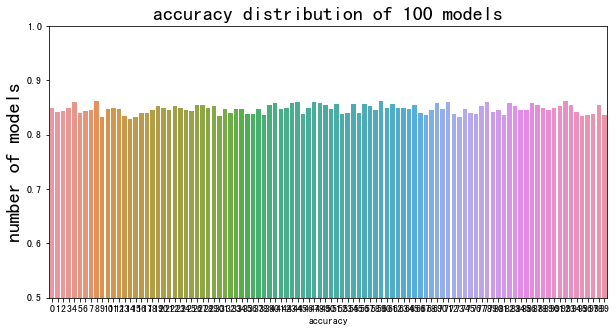

In [69]:
#预测准确性可视化
fig, (ax1) = plt.subplots(1,1, figsize=(10,5))
ax1=sns.barplot(list(range(0,100)),scors)
ax1.set_xlabel("accuracy",fontsize=10)
ax1.set_ylabel("number of models",fontsize=20)
ax1.set_title("accuracy distribution of 100 models",fontsize=20)
plt.ylim([0.5, 1])
plt.show()

### 决策树模型可视化

In [ ]:
# 可视化
from six import StringIO
import pydotplus
import graphviz  
from IPython.display import Image
from sklearn import tree

In [71]:
#区分训练集、测试集
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)

In [72]:
#----不剪枝

#定义决策树模型
dtc = DecisionTreeClassifier(random_state=20)
#在训练集上训练模型
dtc.fit(training_inputs, training_classes)
#在测试集上测试
# Validate the classifier on the testing set using classification accuracy
s=dtc.score(testing_inputs, testing_classes)  #在测试集上的准确性
print(s)

0.864


In [73]:
# 要定义特征的标签和类别标签
data_feature_name = list(data.columns)
data_target_name = ['0','1','2']

#不剪枝
dt = tree.export_graphviz(dtc,out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,
                                filled=True, 
                                rounded=True,
                                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dt)
img1 = Image(graph1.create_png())


<img src="./pics/ot.png">

In [75]:
#-----剪枝
dt = DecisionTreeClassifier(random_state=20,
                            max_depth=3,         #树的最大深度
                            min_samples_split=20,  #样本数量大于多少才能进行下一步分枝
                            min_samples_leaf=10,    #叶子节点中样本数的最小值
                            min_weight_fraction_leaf=0,  #叶子节点所有样本权重和的最小值
                            max_leaf_nodes=None,   #最大的叶子节点的个数
                            min_impurity_decrease=0)   #最小的不纯度（基尼系数、信息增益等）

#训练模型
# Train the classifier on the training set
dt.fit(training_inputs, training_classes)
#所得模型的准确性
# Validate the classifier on the testing set using classification accuracy
s=dt.score(testing_inputs, testing_classes)
print(s)

0.788


In [76]:
cut_tree = tree.export_graphviz(dt,out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,filled=True, 
                                rounded=True,
                                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(cut_tree)
img1 = Image(graph1.create_png())


In [77]:
graph1.write_png("pics/out1.png")

True

<img src="./pics/out1.png" width=800 heigth=700>

## 回归树

决策树还可以用于回归任务，回归树的原理和做法与分类树一样。

In [78]:
#调包
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image,display

In [79]:
#回归树
inputs=df[feature]
labels=df[label]

#划分训练集和测试集
(train_X,
 test_X,
 train_y,
 test_y) = train_test_split(inputs, labels, train_size=0.5, random_state=5029)


#定义回归决策树对象
regs = DecisionTreeRegressor(random_state=20,
                             max_depth=3,
                            min_samples_split=20,  #样本数量大于多少才能进行下一步分枝
                            min_samples_leaf=10,  )  #叶子节点中样本数的最小值)
#在训练集上训练模型
regs.fit(train_X, train_y)
#在测试集上预测y
y_pred=regs.predict(test_X)

print(MSE(test_y['lnincm'],y_pred))


6.380311424966743


In [80]:
print(regs.tree_)

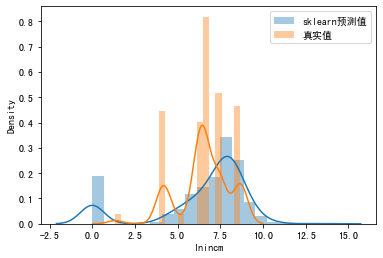

In [81]:
#真实值与预测值分布图

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


sns.distplot(df['lnincm'],bins=20,label='sklearn预测值')
sns.distplot(y_pred,bins=20,label='真实值')

plt.legend()
plt.show()

In [82]:
dot_data=tree.export_graphviz(regs,
               out_file=None,
               feature_names=feature,
               class_names=labels,
               filled=True,
               rounded=True
               )
graph2=pydotplus.graph_from_dot_data(dot_data)

img2 = Image(graph2.create_png())


In [83]:
graph2.write_png("pics/out2.png")

True

 <img src="./pics/out2.png" width=800 heigth=600>

In [85]:
#每个样本所处的叶子节点
regs.apply(train_X)
regs.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                      random_state=20)>

## 随机森林

随机森林是建立在决策树基础上的集成学习器

集成学习的三种类型: bagging,boosting,stacking

In [49]:
#导入RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 划分训练集测试集
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)


#创建随机森林分类器对象
rf = RandomForestClassifier(random_state=0,
                            n_estimators=100,
                            oob_score=True)  #袋外误差
#训练模型
model= rf.fit(training_inputs,training_classes)

#查看袋外误差
print(rf.oob_score_)

#模型在测试集上的表现
print(rf.score(testing_inputs,testing_classes))


## 特征选择——决策树特征重要性

决策树模型的特征重要性可以直接用DecisionTreeClassifier.feature_importances_调取


In [1]:
#决策树特征重要性

#定义决策树模型
dtc = DecisionTreeClassifier(random_state=20)
#在训练集上训练模型
dtc.fit(training_inputs, training_classes)
importance=list(dtc.feature_importances_)

NameError: name 'DecisionTreeClassifier' is not defined

In [88]:
impd=pd.DataFrame(list(zip(data.columns,importance)), 
                   columns = ['variable', 'importance'])

In [89]:
impd

,variable,importance
0,age,0.004563
1,gender,0.000000
2,lnincm,0.036339
3,lnfincm,0.016050
4,isco08,0.004054
5,manage,0.011064
6,dwtype,0.352393
7,tizhi,0.004054
8,party,0.000000
9,hukou,0.055554


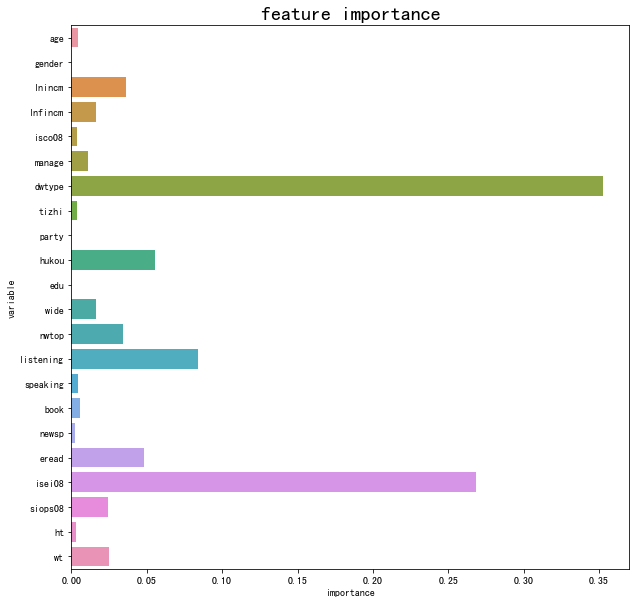

In [90]:
#特征重要性可视化
plt.figure(figsize=(10,10))
sns.barplot(impd['importance'],impd['variable'])

plt.title("feature importance",fontsize=20)
plt.show()

## 使用gridsearch调参

In [91]:
# 使用gridsearch的方法调参
from sklearn.model_selection import GridSearchCV

In [92]:
#设置参数空间
param_test1 = {'max_features':range(4,len(data.columns)+1),   #使用多少feature来预测
               'max_depth':range(3,6,1),        # 树的深度      
               'min_samples_leaf':range(10,200,50),  #叶子最小样本数
               }

X=all_inputs
y=all_classes

grid=[]
gsearch = GridSearchCV(
           estimator = DecisionTreeClassifier(
                                              random_state=20,        
                                              #min_samples_leaf=30

                                              ), 
                   param_grid = param_test1,          
                   refit=True,
                   #scoring='roc_auc',                   
                   cv=10)  # 十折交叉验证
#拟合模型
gsearch.fit(X,y)
#保存结果
grid={"best_params":gsearch.best_params_, 
          "best_score":gsearch.best_score_,
          "cv_results":gsearch.cv_results_,
          "best_estimator":gsearch.best_estimator_,
          "best_index":gsearch.best_index_,
          "scorer":gsearch.scorer_,
          #"feature_names":feature_names_in_
          }

#打印最好模型的参数设置和准确性
print(gsearch.best_params_, gsearch.best_score_)



{'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 10} 0.8699999999999999
